### Index No - 190621M
### Name - K. Thanushan 

### EN2550 Assignment 01
### Intensity Transformations and Neighborhood Filtering

### Question 1. Performing a given intensity transformation for a given image

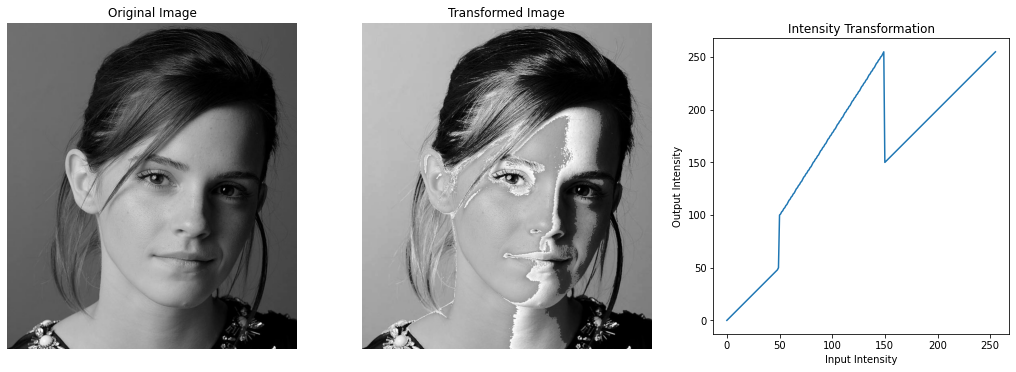

In [4]:
#Question 1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the image and plotting its original version
Original_image = cv.imread(r'emma_gray.jpg')
assert Original_image is not None

#Performing the given intensity transformation and plotting the transformed image
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

#Getting the transformed image
assert len(t) == 256
Transformed_image = cv.LUT(Original_image, t)
assert Transformed_image is not None

#Plotting the Images and the intensity transformation
Image = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
Img = cv.cvtColor(Transformed_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize = (18,6))
ax[0].imshow(Image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(Img)
ax[1].set_title('Transformed Image')
ax[1].axis('off')
ax[2].plot(t)
ax[2].set_title('Intensity Transformation')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_aspect('equal')
plt.show()


### Question 2. Performing Intensity Transformations to accentuate white matter and gray matter 

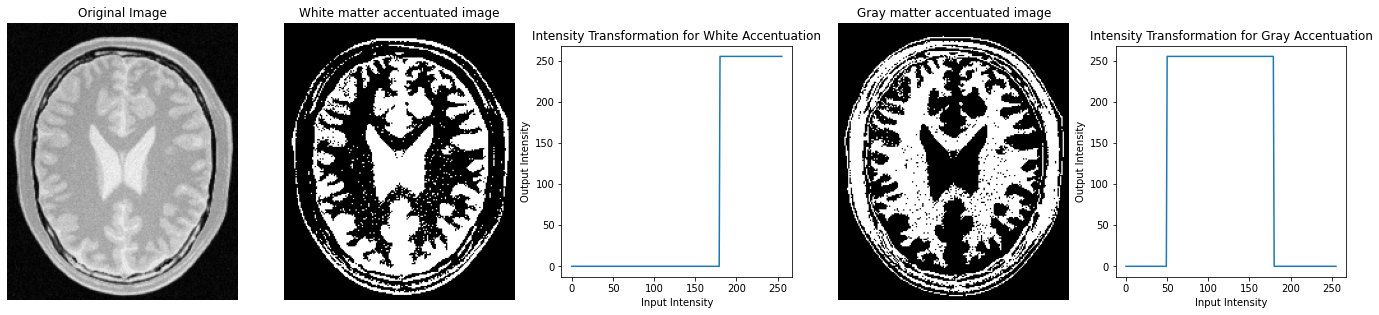

In [13]:
#Question 2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'brain_proton_density_slice.png')
assert Original_image is not None

#Transforming the image
#White accentuation
t1 = np.linspace(0, 0, 180)
t2 = np.linspace(255, 255, 76)
transform_1 = np.concatenate((t1, t2), axis = 0).astype(np.uint8)
Transformed_image_white = cv.LUT(Original_image,transform_1)

#Gray accentuation
t1 = np.linspace(0, 0, 50)
t2 = np.linspace(255, 255, 130)
t3 = np.linspace(0, 0, 76)
transform_2 = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
Transformed_image_gray = cv.LUT(Original_image,transform_2)

#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 5, figsize = (24,6))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(Transformed_image_white)
ax[1].set_title("White matter accentuated image")
ax[1].axis('off')
ax[2].plot(transform_1)
ax[2].set_title('Intensity Transformation for White Accentuation')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_aspect('equal')
ax[3].imshow(Transformed_image_gray)
ax[3].set_title("Gray matter accentuated image")
ax[3].axis('off')
ax[4].plot(transform_2)
ax[4].set_title('Intensity Transformation for Gray Accentuation')
ax[4].set_xlabel('Input Intensity')
ax[4].set_ylabel('Output Intensity')
ax[4].set_aspect('equal')
plt.show()

### Question 3. Gamma Correction($\gamma = 0.5$) and Histograms 

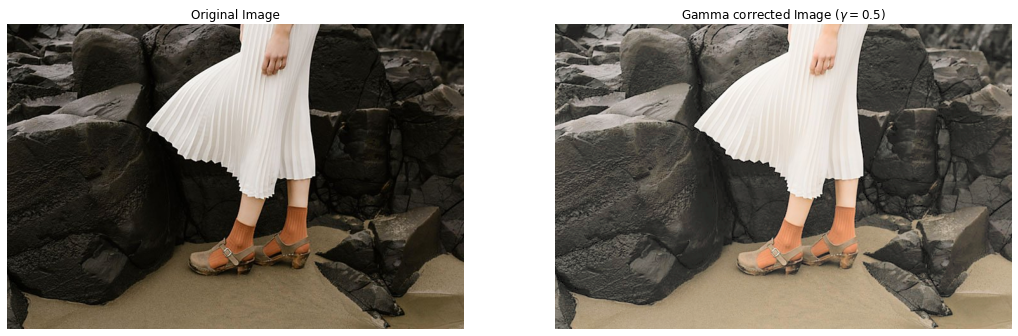

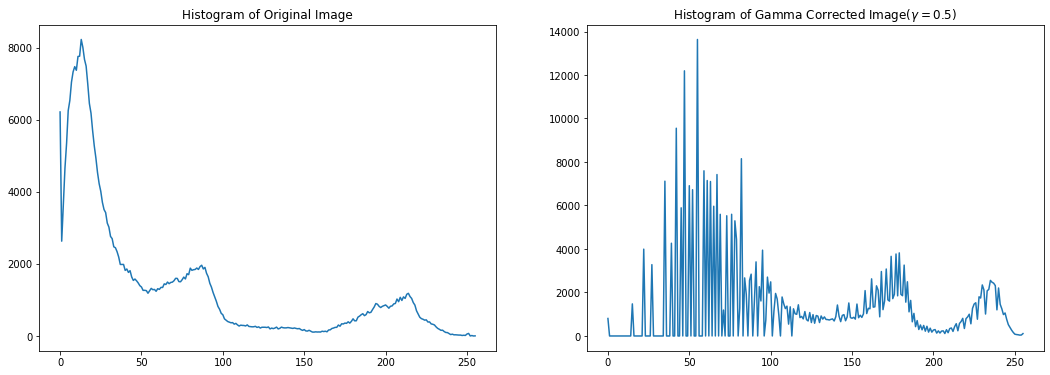

In [7]:
#Question 3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'highlights_and_shadows.jpg')
assert Original_image is not None

#Performing gamma correction
Gamma = 0.5
Lab = cv.cvtColor(Original_image, cv.COLOR_BGR2Lab)
t = np.array([(p/255)**Gamma*255 for p in range(0,256)]).astype(np.uint8)
g = cv.LUT(Lab[:,:,0],t)
New_image = Lab
New_image[:,:,0] = g
assert New_image is not None

#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize = (18,6))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')
ax[0].axis('off')

Image_plot2= cv.cvtColor(New_image, cv.COLOR_Lab2RGB)
ax[1].imshow(Image_plot2)
ax[1].set_title("Gamma corrected Image ($\gamma = 0.5$)")
ax[1].axis('off')
plt.show()

#Calculating the histograms of the images
Original_image_histogram = cv.calcHist([Original_image], [0], None, [256], [0,256])
Changed_image_histogram = cv.calcHist([New_image], [0], None, [256], [0,256])

#Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize = (18,6))
ax[0].plot(Original_image_histogram)
ax[0].set_title('Histogram of Original Image')
ax[1].plot(Changed_image_histogram)
ax[1].set_title('Histogram of Gamma Corrected Image($\gamma = 0.5$)')
plt.show()


### Question 4. Calculating and Equalizing the histogram of a given image

Text(0.5, 1.0, 'Histogram of Equalized Image')

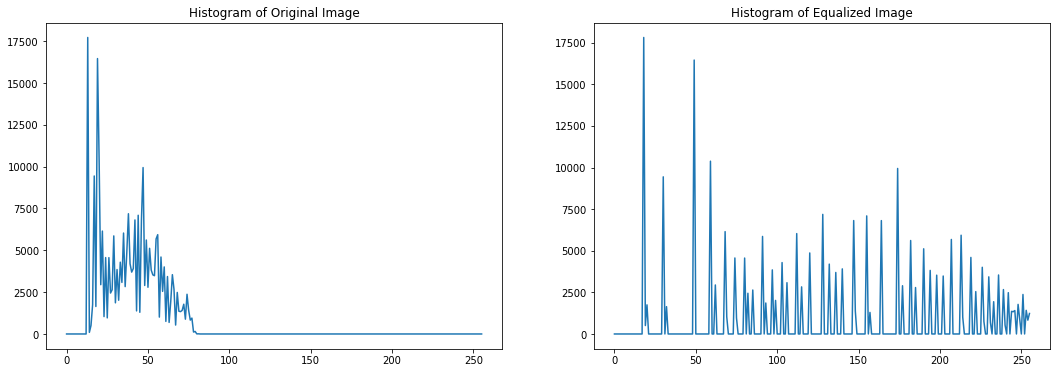

In [83]:
#Question 4
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Equalization function
def Equalize(Original_image, Original_image_histogram, S):
    N = len(Original_image_histogram)
    Image = np.zeros((S[0], S[1]))
    Equalize_List = []
    for i in range(N):
        Sumlist = Original_image_histogram[:i+1]
        Value = ((N-1)/(S[0]*S[1]))*(sum(Sumlist))
        Equalize_List.append(Value)
    Equalize_List = np.round(Equalize_List)
    for i in range(S[0]):
        for j in range(S[1]):
            Value = Original_image[i,j]
            Original_image[i,j] = Equalize_List[Value]
    return Original_image

#Reading the image
Initial_image = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert Initial_image is not None

#Calculating the histograms of the initial image and the equalized image
Original_image_histogram = cv.calcHist([Initial_image], [0], None, [256], [0,256])
Equalized_image = cv.equalizeHist(Initial_image)
S = np.shape(Initial_image)
Equalized_image = Equalize(Initial_image, Original_image_histogram, S)
Equalized_image_histogram = cv.calcHist([Equalized_image], [0], None, [256], [0,256])


#Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize = (18,6))
ax[0].plot(Original_image_histogram)
ax[0].set_title('Histogram of Original Image')
ax[1].plot(Equalized_image_histogram)
ax[1].set_title('Histogram of Equalized Image')


### Question 5. Zooming a given image

In [1]:
#Question 5
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Zoom functon
def NearestNeighborZoom(Image, scale):
    shape = np.shape(Image)
    Rows = int(shape[0]*scale)
    Columns = int(shape[1]*scale)
    Zoomed_image = np.zeros((Rows, Columns), dtype = np.uint8)
    for i in range(0, Rows):
        for j in range(0, Columns):
            X = round(i/scale)
            Y = round(j/scale)
            Zoomed_image[i,j] = Image[X, Y]
    return Zoomed_image

def BilinearZoom(Image, scale):
    shape = np.shape(Image)
    Rows = int(shape[0]*scale)
    Columns = int(shape[1]*scale)
    Zoomed_image = np.zeros((Rows, Columns), dtype = Image.dtype)
    for i in range(0, Rows):
        for j in range(0, Columns):
            for k in range(0, shape[2]):
                Zoomed_image[i,j,k] = Image[round(i/scale), round(j/scale), round(k/scale)]
    return Zoomed_image

#Reading the given image
Original_image = cv.imread(r'im01small.png')
assert Original_image is not None
shape = np.shape(Original_image)
print(shape)
#Zooming the images
Zoomed_image1 = NearestNeighborZoom(Original_image, 4)

#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize = (18,6))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')
ax[0].axis('off')

#Image_plot2= cv.cvtColor(Zoomed_image1, cv.COLOR_Lab2RGB)
#ax[1].imshow(Image_plot2)
ax[1].set_title("Gamma corrected Image ($\gamma = 0.5$)")
ax[1].axis('off')
#Image_plot3= cv.cvtColor(New_image, cv.COLOR_Lab2RGB)
#ax[2].imshow(Image_plot2)
ax[2].set_title("Gamma corrected Image ($\gamma = 0.5$)")
ax[2].axis('off')
plt.show()

(1080, 1920, 3)


### Question 6. Sobel filtering

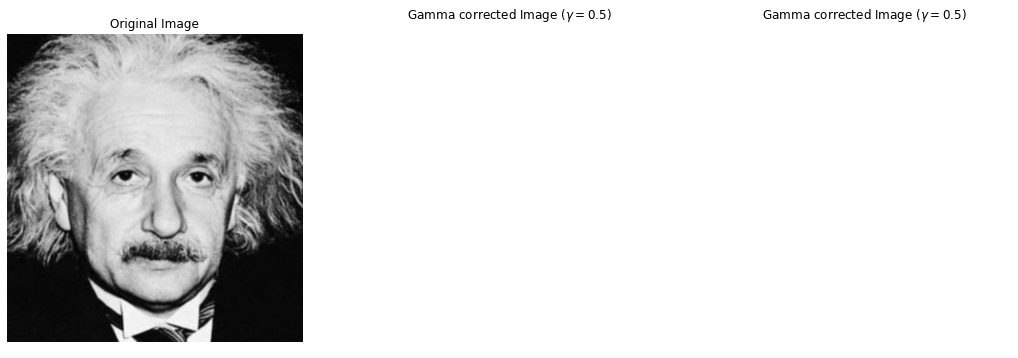

In [ ]:
#Question 5
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'einstein.png')
assert Original_image is not None

#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize = (18,6))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')
ax[0].axis('off')

#Image_plot2= cv.cvtColor(New_image, cv.COLOR_Lab2RGB)
#ax[1].imshow(Image_plot2)
ax[1].set_title("Gamma corrected Image ($\gamma = 0.5$)")
ax[1].axis('off')
#Image_plot3= cv.cvtColor(New_image, cv.COLOR_Lab2RGB)
#ax[2].imshow(Image_plot2)
ax[2].set_title("Gamma corrected Image ($\gamma = 0.5$)")
ax[2].axis('off')
plt.show()

### Question 7. Enhancing a given image

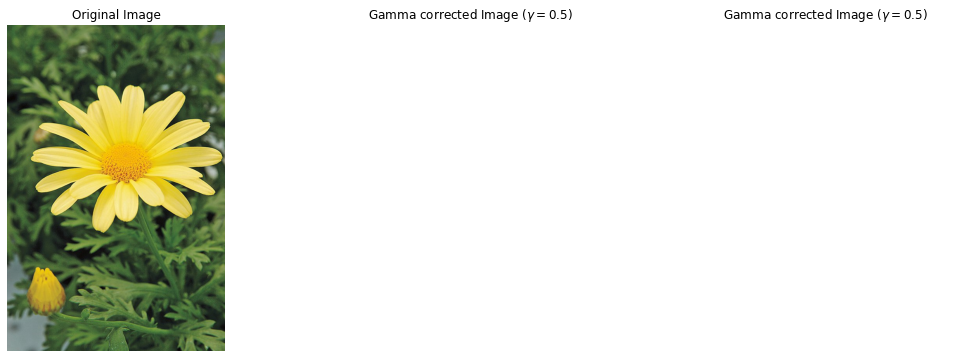

In [14]:
#Question 5
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'daisy.jpg')
assert Original_image is not None

#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize = (18,6))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')
ax[0].axis('off')

#Image_plot2= cv.cvtColor(New_image, cv.COLOR_Lab2RGB)
#ax[1].imshow(Image_plot2)
ax[1].set_title("Gamma corrected Image ($\gamma = 0.5$)")
ax[1].axis('off')
#Image_plot3= cv.cvtColor(New_image, cv.COLOR_Lab2RGB)
#ax[2].imshow(Image_plot2)
ax[2].set_title("Gamma corrected Image ($\gamma = 0.5$)")
ax[2].axis('off')
plt.show()